In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
#sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)

# Black-Scholes Option Priceing
In risk-neutral settings, the call and put option price at time 0 is given by 
$$
\begin{align}
C(0) &= e^{-rt} \mathbb{E}[C(t)] = S(0)\Phi(d_1) - K e^{-rt}\Phi(d_2),\\
P(0) &= e^{-rt} \mathbb{E}[P(t)] = -S(0)\Phi(-d_1) + K e^{-rt}\Phi(-d_2)
\end{align}
$$

where
$$
d_1 = \frac{\ln\left(\frac{S(0)}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)t}{\sigma \sqrt{t}}, \qquad
d_2 = d_1 - \sigma\sqrt{t}.
$$
Here, $t$ is the time to expiration, $S(0)$ is the spot price, and 

# Call option
## Time sensitivity
We first investigate on the rate of change of call option price with respect to the time to expiration.

In [2]:
S0 = 100
K = 110
sigma = 0.3
r = 0.0

# different time to expiration
times = np.linspace(1/12, 5, 70)

# call option price for different expiration time
call_prices_timeChange = [
    bs_call(S0, K, sigma, t=times[i], r=r) for i in range(len(times))
]


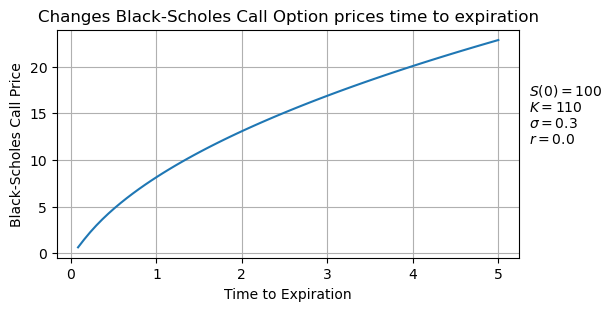

In [3]:
fig11, ax11 = plt.subplots(1, 1, figsize=[6, 3], layout='constrained')
ax11.plot(times, call_prices_timeChange)
ax11.set_title('Changes Black-Scholes Call Option prices time to expiration', size = 12)
ax11.set_xlabel('Time to Expiration')
ax11.set_ylabel('Black-Scholes Call Price')
ax11.text(1.02, 0.5, f'$S(0)={S0}$\n$K={K}$\n$\sigma={sigma}$\n$r={r}$', transform=ax11.transAxes)
ax11.grid('on')
#ax1.set_xlim(0, 3)

From the plot, we see that the Call option price increase monotonically as the expiration time increase. This can be understood since as the time to expiration increase, the uncertainty of the stock movements increase and the call option price increase to compensate for the increase possibility for loss. 

We further explore the time sensitivity on the effect of yearly valitility $\sigma$ and risk-free interest $r$

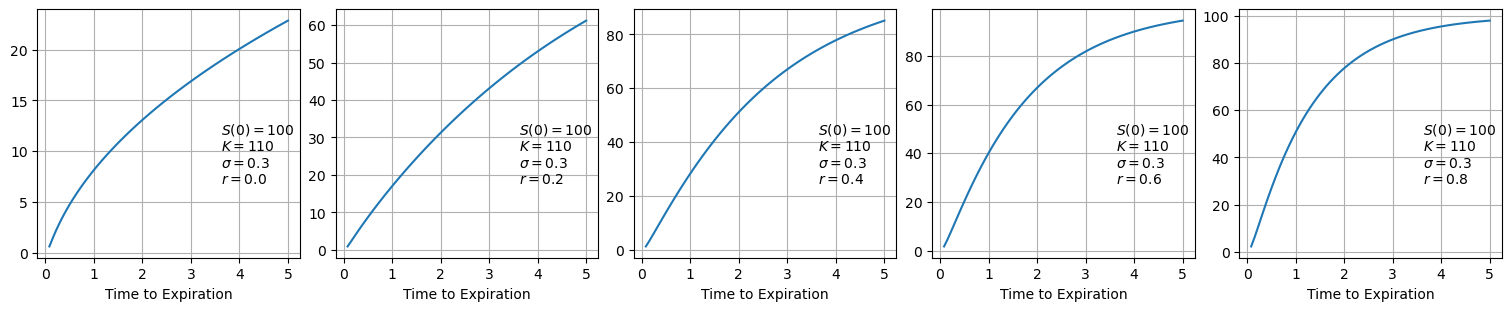

In [4]:
S0 = 100
K = 110
sigma = 0.3
rs = [0.0, 0.2, 0.4, 0.6, 0.8]

times = np.linspace(1 / 12, 5, 70)

fig12, axs12 = plt.subplots(1, 5, figsize=[15, 3], layout="constrained")
for r, ax in zip(rs, axs12):
    call_prices_timeChange = [
        bs_call(S0, K, sigma, t=times[i], r=r) for i in range(len(times))
    ]
    ax.plot(times, call_prices_timeChange)
    ax.text(0.7, 0.3, f'$S(0)={S0}$\n$K={K}$\n$\sigma={sigma}$\n$r={r}$', transform=ax.transAxes)
    ax.set_xlabel('Time to Expiration')
    ax.grid('on')

As the risk-free interest rate increase, the trend of call option price change rate respect to expiration time remains the same, while the overall price increase as the risk-free intrest rate increase. This is understandable as the more 'free' money will be add to stock price and increase the value of call option. 

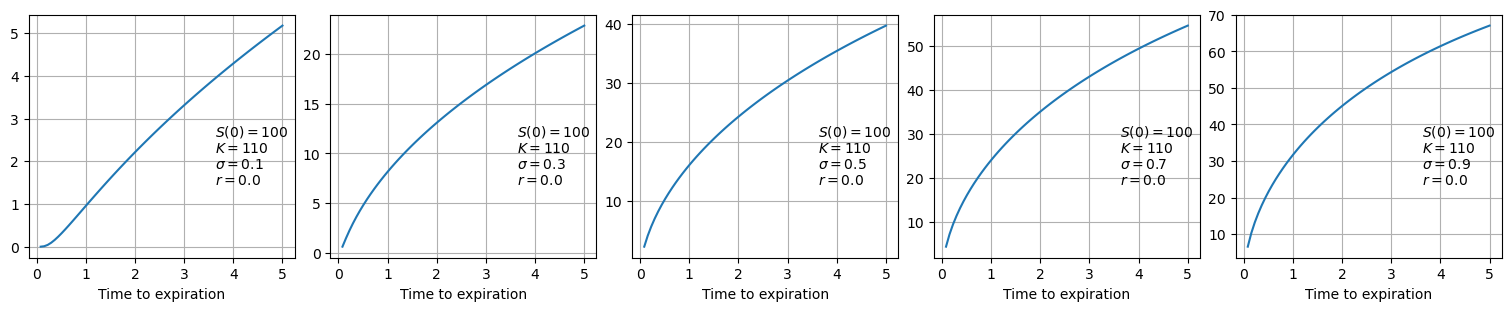

In [5]:
S0 = 100
K = 110
sigmas = [0.1, 0.3, 0.5, 0.7, 0.9]
r = 0.0

times = np.linspace(1 / 12, 5, 70)

fig13, axs13 = plt.subplots(1, 5, figsize=[15, 3], layout="constrained")
for sigma, ax in zip(sigmas, axs13):
    call_prices_timeChange = [
        bs_call(S0, K, sigma, t=times[i], r=r) for i in range(len(times))
    ]
    ax.plot(times, call_prices_timeChange)
    ax.text(0.7, 0.3, f'$S(0)={S0}$\n$K={K}$\n$\sigma={sigma}$\n$r={r}$', transform=ax.transAxes)
    ax.set_xlabel('Time to expiration')
    ax.grid('on')

For all the parameters we have used, the call option price increase monotonically with the length of expiration time.
* As the risk-free interest rate increase, the option price with the same expiration date increase
* As the yearly volatility $\sigma$ increase, the call option price also increase as a more volatile stock would exceed the strike price more. 

## Spot price sensitivity

In [6]:
# various spot price
S0s = np.linspace(10, 200, 100)
K = 110
sigma = 0.3
r = 0
time = 4  # np.linspace(1/12, 5, 70)
call_prices_spotChange = [bs_call(S0, K, sigma, t=time, r=r) for S0 in S0s]

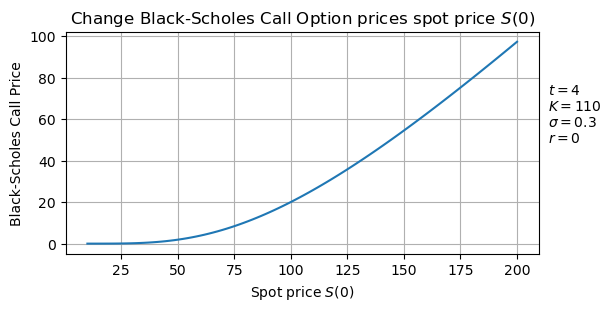

In [7]:
fig21, ax21 = plt.subplots(1, 1, figsize=[6, 3], layout='constrained')
ax21.plot(S0s, call_prices_spotChange)
ax21.set_title('Change Black-Scholes Call Option prices spot price $S(0)$')
ax21.text(1.02, 0.5, f'$t={time}$\n$K={K}$\n$\sigma={sigma}$\n$r={r}$', transform=ax21.transAxes)
ax21.set_xlabel('Spot price $S(0)$')
ax21.set_ylabel('Black-Scholes Call Price')
ax21.grid('on')

From the plot, we see that the call option price increase as the spot price of the stock increase. As the spot price increase at time 0, the stock price at the expiration date would be more likely to be in a higher price and increase the profit made from the call option. 

We again check the effect of yearly valitility $\sigma$ and risk-free interest rate $r$

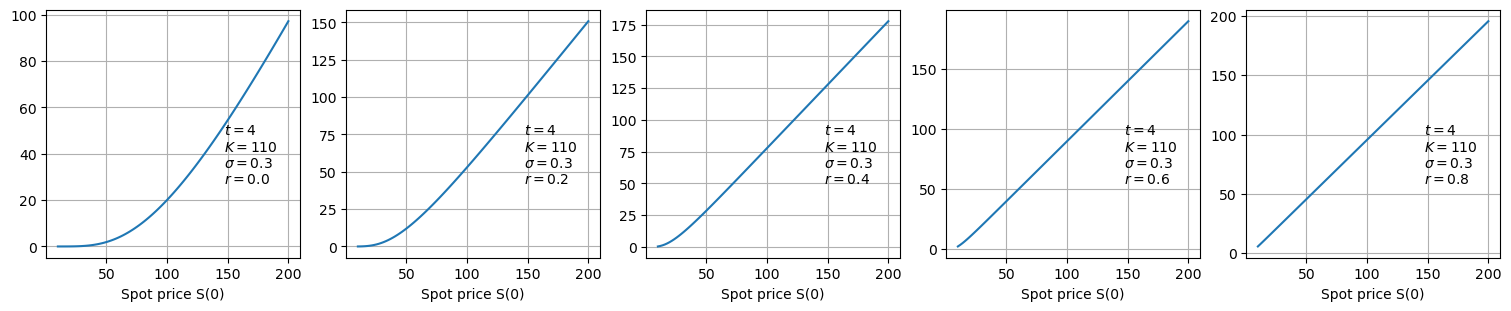

In [14]:
S0s = np.linspace(10, 200, 100)
K = 110
sigma = 0.3
rs = [0.0, 0.2, 0.4, 0.6, 0.8]
time = 4  # np.linspace(1/12, 5, 70)



fig22, axs22 = plt.subplots(1, 5, figsize=[15, 3], layout="constrained")
for r, ax in zip(rs, axs22):
    call_prices_spotChange = [bs_call(S0, K, sigma, t=time, r=r) for S0 in S0s]
    ax.plot(S0s, call_prices_spotChange)
    ax.text(0.7, 0.3, f'$t={time}$\n$K={K}$\n$\sigma={sigma}$\n$r={r}$', transform=ax.transAxes)
    ax.set_xlabel('Spot price S(0)')
    ax.grid('on')

The call price increase monotonically with spot price $S(0)$ for all interest rate. 
* As the risk-free interest rate increase, the call price change almost linearly with spot price 
* The change of call price per sport price increase as the risk-free interest rate increase

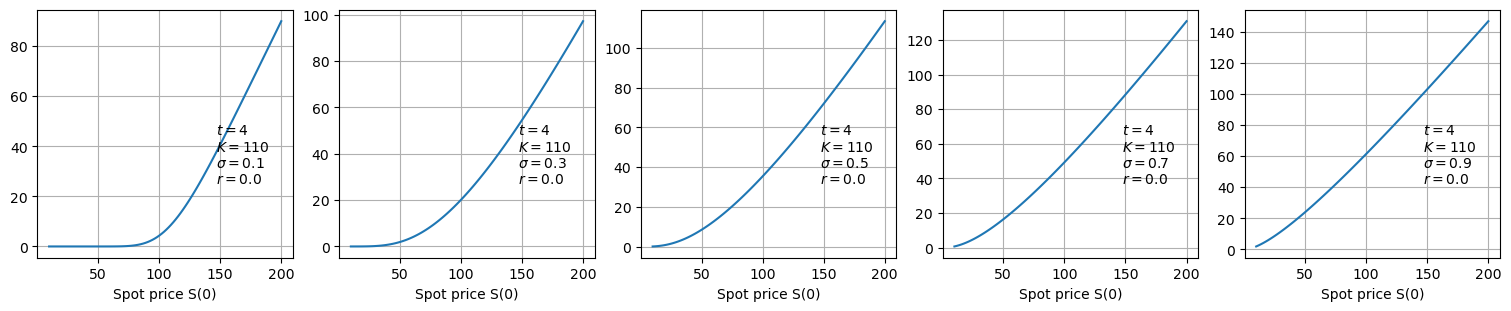

In [16]:
S0s = np.linspace(10, 200, 100)
K = 110
sigmas = [0.1, 0.3, 0.5, 0.7, 0.9]
r = 0.0
time = 4  # np.linspace(1/12, 5, 70)



fig23, axs23 = plt.subplots(1, 5, figsize=[15, 3], layout="constrained")
for sigma, ax in zip(sigmas, axs23):
    call_prices_spotChange = [bs_call(S0, K, sigma, t=time, r=r) for S0 in S0s]
    ax.plot(S0s, call_prices_spotChange)
    ax.text(0.7, 0.3, f'$t={time}$\n$K={K}$\n$\sigma={sigma}$\n$r={r}$', transform=ax.transAxes)
    ax.set_xlabel('Spot price S(0)')
    ax.grid('on')

The call price also increase monotonically as the spot price increase. The stock price volatility show positive effect on the change rate

## Summary
**Time sensitivity**
* Call option price increase monotonically as the expiration time increase
* Both risk-free interest and stock price volatility show positive effect on the rate of change of call option price respect to expiration time

**Spot price sensitivity**
* Call option price increase monotonically as the spot price increase
* Both risk-free interest and stock price volatility show positive effect on the rate of change of call option price respect to spot price

# Put option
## Time sensitivity
Now we switch to put option and start with its rate of change respect to the expiration date

In [ ]:
S0 = 100
K = 110
sigma = 0.3
r = 0.1

times = np.linspace(1/12, 5, 70)

# get put option price with different time to expiration
put_prices_timeChange = [
    bs_put(S0, K, sigma, t=times[i], r=r) for i in range(len(times))
]


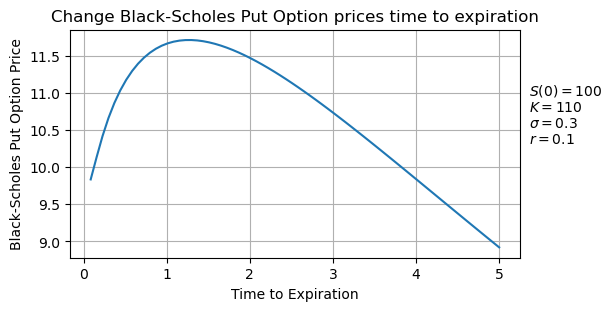

In [ ]:
fig31, ax31 = plt.subplots(1, 1, figsize=[6, 3], layout='constrained')
ax31.plot(times, put_prices_timeChange)
ax31.text(1.02, 0.5, f'$S(0)={S0}$\n$K={K}$\n$\sigma={sigma}$\n$r={r}$', transform=ax31.transAxes)
ax31.set_title('Change Black-Scholes Put Option prices time to expiration')
ax31.set_xlabel('Time to Expiration')
ax31.set_ylabel('Black-Scholes Put Option Price')
ax31.grid('on')

Noticed that the rate of change of put option price is no longer monotone with the parameter in use
* When expiration time is long, the change rate of put price respect to expiration time is negative
  * In long term, the risk-free interest rate will eventually increase the stock price and thus decrease the value of put option
* When expiration time is short, the change rate of put price respect to expiration time is positive
  * In short term, the volatility of the stock price effect more on the stock price and the stock price is more likely to drop

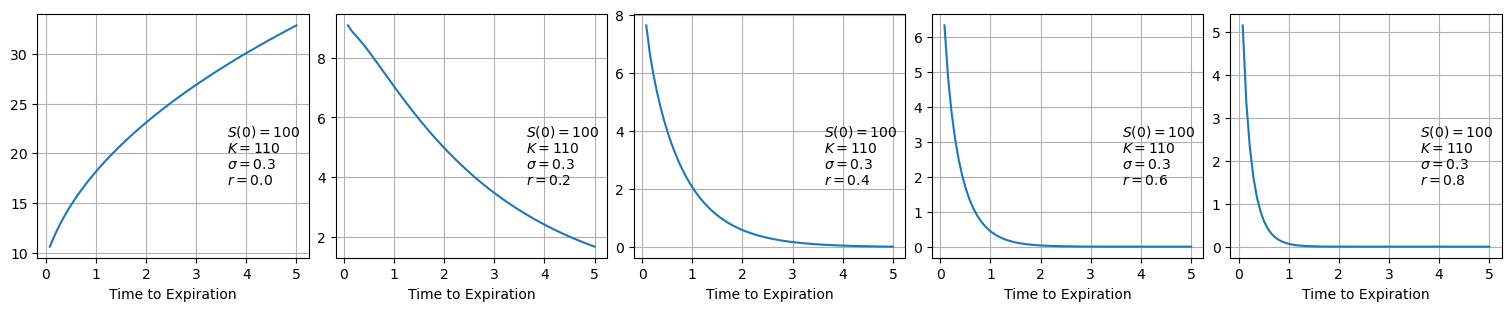

In [12]:
S0 = 100
K = 110
sigma = 0.3
rs = [0.0, 0.2, 0.4, 0.6, 0.8]

times = np.linspace(1 / 12, 5, 70)

fig32, axs32 = plt.subplots(1, 5, figsize=[15, 3], layout="constrained")
for r, ax in zip(rs, axs32):
    put_prices_timeChange = [
        bs_put(S0, K, sigma, t=times[i], r=r) for i in range(len(times))
    ]
    ax.plot(times, put_prices_timeChange)
    ax.text(0.7, 0.3, f'$S(0)={S0}$\n$K={K}$\n$\sigma={sigma}$\n$r={r}$', transform=ax.transAxes)
    ax.set_xlabel('Time to Expiration')
    ax.grid('on')

From the plot, we see that as the risk-free interest rate increase, the change rate of put price with respect to expiration date experience a transition from monotone increase to convex down and then monotone decrease (at least within the time scope we are investigating)
* As the risk-free interest rate increase, the stock price will increase more (more free money), and decrease the value of the put price

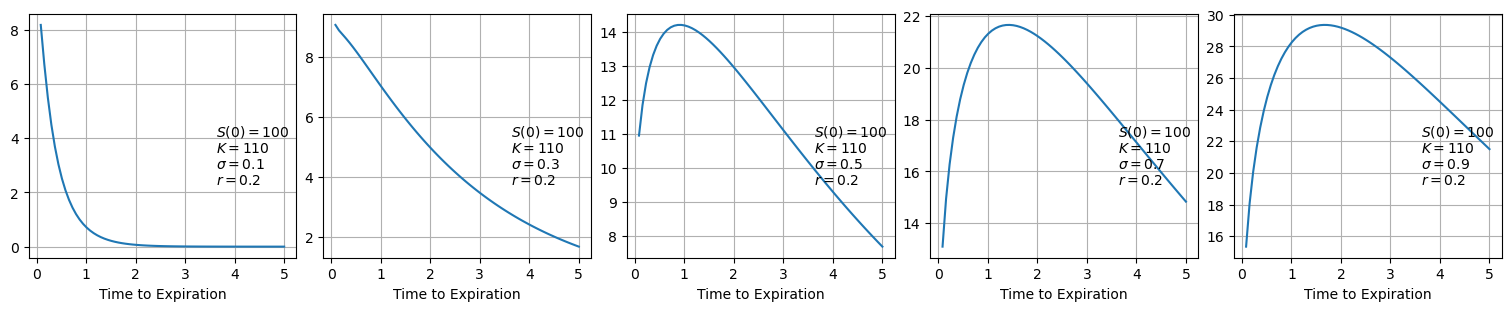

In [28]:
S0 = 100
K = 110
sigmas = [0.1, 0.3, 0.5, 0.7, 0.9]
r = 0.2

times = np.linspace(1 / 12, 5, 70)

fig33, axs33 = plt.subplots(1, 5, figsize=[15, 3], layout="constrained")
for sigma, ax in zip(sigmas, axs33):
    put_prices_timeChange = [
        bs_put(S0, K, sigma, t=times[i], r=r) for i in range(len(times))
    ]
    ax.plot(times, put_prices_timeChange)
    ax.text(0.7, 0.3, f'$S(0)={S0}$\n$K={K}$\n$\sigma={sigma}$\n$r={r}$', transform=ax.transAxes)
    ax.set_xlabel('Time to Expiration')
    ax.grid('on')

Noticed that as the stock volatility increase, the change rate of put option with respect to expiration time transit from monotonic decrease to convex down. 
* When the stock volatility is small, the risk-free interest will influence more increasing the stock price, and there fore the put price drop
* When the stock volatility is high enough, the stock price is more likely tyo drop when during short time, causing the increase of put price when expiration time is short

## Spot price sensitivity
We now look at the put option price change with the spot price. 

In [ ]:
S0s = np.linspace(10, 200, 100)
K = 110
sigma = .3
r=0
time = 4 #np.linspace(1/12, 5, 70)


put_prices_spotChange = [bs_put(S0,K,sigma, t = time, r=r) for S0 in S0s] 




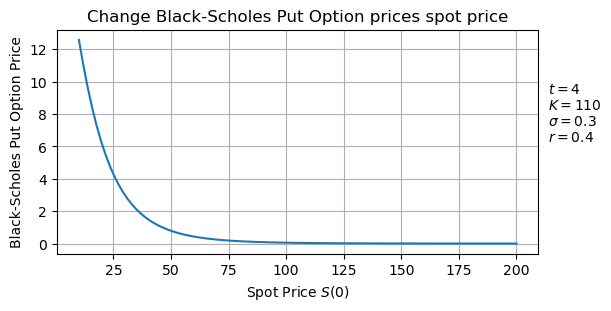

In [25]:
fig41, ax41 = plt.subplots(1, 1, figsize=[6, 3], layout='constrained')
ax41.plot(S0s, put_prices_spotChange)
ax41.text(1.02, 0.5, f'$t={time}$\n$K={K}$\n$\sigma={sigma}$\n$r={r}$', transform=ax41.transAxes)
ax41.set_title('Change Black-Scholes Put Option prices spot price')
ax41.set_xlabel('Spot Price $S(0)$')
ax41.set_ylabel('Black-Scholes Put Option Price')
ax41.grid('on')

The put option prices drops as the spot price increase. The higher the spot price, the more likely the stock price will be higher and decrease the value of put price. When the initial spot price is higher than the strike price, the value of put option is almost zero.

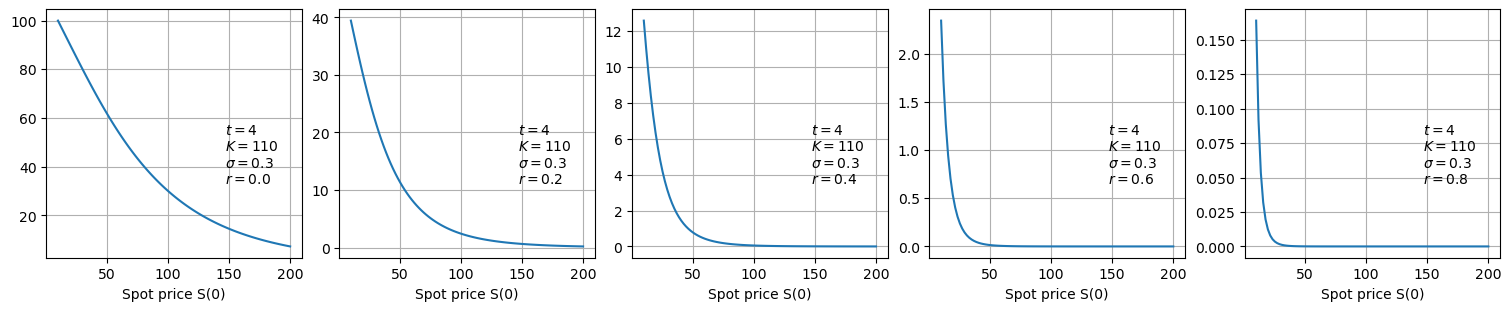

In [20]:
S0s = np.linspace(10, 200, 100)
K = 110
sigma = 0.3
rs = [0.0, 0.2, 0.4, 0.6, 0.8]
time = 4  # np.linspace(1/12, 5, 70)



fig42, axs42 = plt.subplots(1, 5, figsize=[15, 3], layout="constrained")
for r, ax in zip(rs, axs42):
    put_prices_spotChange = [bs_put(S0, K, sigma, t=time, r=r) for S0 in S0s]
    ax.plot(S0s, put_prices_spotChange)
    ax.text(0.7, 0.3, f'$t={time}$\n$K={K}$\n$\sigma={sigma}$\n$r={r}$', transform=ax.transAxes)
    ax.set_xlabel('Spot price S(0)')
    ax.grid('on')

Higher risk-free interest cause the stock price move to a higher price at expiration and there froe increase the drop rate on the put price respect to spot price. 

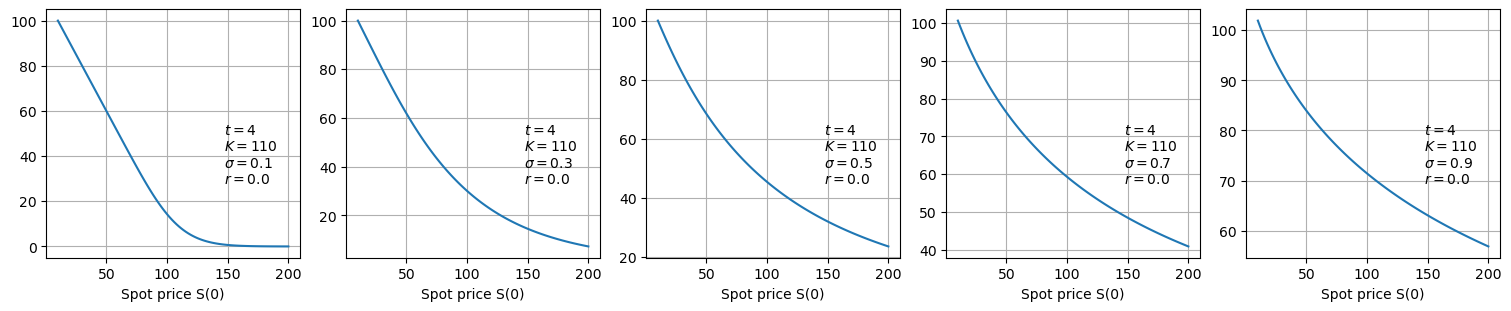

In [26]:
S0s = np.linspace(10, 200, 100)
K = 110
sigmas = [0.1, 0.3, 0.5, 0.7, 0.9]
r = 0.0
time = 4  # np.linspace(1/12, 5, 70)



fig43, axs43 = plt.subplots(1, 5, figsize=[15, 3], layout="constrained")
for sigma, ax in zip(sigmas, axs43):
    put_prices_spotChange = [bs_put(S0, K, sigma, t=time, r=r) for S0 in S0s]
    ax.plot(S0s, put_prices_spotChange)
    ax.text(0.7, 0.3, f'$t={time}$\n$K={K}$\n$\sigma={sigma}$\n$r={r}$', transform=ax.transAxes)
    ax.set_xlabel('Spot price S(0)')
    ax.grid('on')

Higher volatility, on the other hand, will make the stock price droping happend more frequently, and therefor reduce the drop rate. 

## Summary
**Time sensitivity**
* On the lang run, the put option price decrease as the expiration time longer.
* The risk-free interest rate will effect the overall behavior of put option price, causing non monotone behavior when interest rate is low.
* The volatility tends to decrease the stock price when time is short, causing non monotone behavior when stock volatility is high
**Spot price sensitivity**
* The put option price drop as the spot price increase, for different interest rate and volatility
* The risk-free interest rate increase the change rate of put price with respect to spot price
* Volatility has opposite effect on the change rate to spot price
